In [3]:
import pandas as pd            
import numpy as np              
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX  
from statsmodels.tsa.stattools import adfuller          
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")                         


In [4]:
df = pd.read_csv('../data/cleaned_data.csv')
print(df.columns)
print(df.dtypes)

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type',
       'locale', 'transferred', 'dcoilwtico', 'city', 'state', 'store_type',
       'cluster', 'transactions', 'year', 'month', 'week', 'quarter',
       'day_of_week', 'is_crisis', 'sales_lag_7', 'rolling_mean_7',
       'is_weekend', 'is_holiday', 'promo_last_7_days', 'days_to_holiday',
       'promotion_status'],
      dtype='object')
date                  object
store_nbr              int64
family                object
sales                float64
onpromotion            int64
holiday_type          object
locale                object
transferred             bool
dcoilwtico           float64
city                  object
state                 object
store_type            object
cluster                int64
transactions         float64
year                   int64
month                  int64
week                   int64
quarter                int64
day_of_week           object
is_crisis              int64
sa

In [10]:
df.shape

(3054348, 27)

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df.dtypes)

date                 datetime64[ns]
store_nbr                     int64
family                       object
sales                       float64
onpromotion                   int64
holiday_type                 object
locale                       object
transferred                    bool
dcoilwtico                  float64
city                         object
state                        object
store_type                   object
cluster                       int64
transactions                float64
year                          int64
month                         int64
week                          int64
quarter                       int64
day_of_week                  object
is_crisis                     int64
sales_lag_7                 float64
rolling_mean_7              float64
is_weekend                    int64
is_holiday                    int64
promo_last_7_days           float64
days_to_holiday               int64
promotion_status             object
dtype: object


In [6]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,...,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days,days_to_holiday,promotion_status
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,...,1,Tuesday,0,0.0,0.0,0,1,0.0,0,Not On Promotion
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,False,93.14,Quito,...,1,Tuesday,0,0.0,0.0,0,1,0.0,0,Not On Promotion
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,False,93.14,Quito,...,1,Tuesday,0,0.0,0.0,0,1,0.0,0,Not On Promotion
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,False,93.14,Quito,...,1,Tuesday,0,0.0,0.0,0,1,0.0,0,Not On Promotion
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,False,93.14,Quito,...,1,Tuesday,0,0.0,0.0,0,1,0.0,0,Not On Promotion


In [7]:
train_df = df[df['date'] < '2017-01-01']
test_df = df[df['date'] >= '2017-01-01']

In [11]:
df['locale'].unique() 

array(['National', nan, 'Local', 'Regional'], dtype=object)

In [8]:
df.isna().sum()

date                       0
store_nbr                  0
family                     0
sales                      0
onpromotion                0
holiday_type               0
locale               2551824
transferred                0
dcoilwtico                 0
city                       0
state                      0
store_type                 0
cluster                    0
transactions               0
year                       0
month                      0
week                       0
quarter                    0
day_of_week                0
is_crisis                  0
sales_lag_7                0
rolling_mean_7             0
is_weekend                 0
is_holiday                 0
promo_last_7_days          0
days_to_holiday            0
promotion_status           0
dtype: int64

In [12]:
df['locale'] = df['locale'].fillna(method='ffill')  # Forward fill
# or
df['locale'] = df['locale'].fillna(method='bfill')  # Backward fill
# or
df['locale'] = df['locale'].interpolate(method='linear')



In [14]:
df.isna().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday_type         0
locale               0
transferred          0
dcoilwtico           0
city                 0
state                0
store_type           0
cluster              0
transactions         0
year                 0
month                0
week                 0
quarter              0
day_of_week          0
is_crisis            0
sales_lag_7          0
rolling_mean_7       0
is_weekend           0
is_holiday           0
promo_last_7_days    0
days_to_holiday      0
promotion_status     0
dtype: int64

In [15]:
series_df = df[(df['store_nbr'] == 1) & (df['family'] == 'AUTOMOTIVE')]


In [16]:
# Example: Removing rows where 'sales' are beyond 3 standard deviations
sales_mean = series_df['sales'].mean()
sales_std = series_df['sales'].std()

series_df = series_df[(series_df['sales'] > sales_mean - 3 * sales_std) & (series_df['sales'] < sales_mean + 3 * sales_std)]


In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(series_df['sales'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -4.0945335308781745
p-value: 0.0009888724491147185


In [ ]:
series_df['sales_diff'] = series_df['sales'] - series_df['sales'].shift(1)


C:\Users\HP\AppData\Local\Temp\ipykernel_29148\3004462051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['sales_diff'] = series_df['sales'] - series_df['sales'].shift(1)


In [ ]:
result = adfuller(series_df['sales_diff'].dropna())
print(f"ADF Statistic (after differencing): {result[0]}")
print(f"p-value (after differencing): {result[1]}")


ADF Statistic (after differencing): -14.795256554971957
p-value (after differencing): 2.1404914893245736e-27


In [ ]:
# Seasonal differencing with period=12 for monthly data
series_df['sales_seasonal_diff'] = series_df['sales'] - series_df['sales'].shift(12)


C:\Users\HP\AppData\Local\Temp\ipykernel_29148\4122544215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['sales_seasonal_diff'] = series_df['sales'] - series_df['sales'].shift(12)


In [ ]:
series_df['sales_lag_7'] = series_df['sales'].shift(7)
series_df['sales_lag_30'] = series_df['sales'].shift(30)


C:\Users\HP\AppData\Local\Temp\ipykernel_29148\3352361188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['sales_lag_7'] = series_df['sales'].shift(7)
C:\Users\HP\AppData\Local\Temp\ipykernel_29148\3352361188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['sales_lag_30'] = series_df['sales'].shift(30)


In [ ]:
series_df['rolling_mean_7'] = series_df['sales'].rolling(window=7).mean()
series_df['rolling_std_7'] = series_df['sales'].rolling(window=7).std()


C:\Users\HP\AppData\Local\Temp\ipykernel_29148\1283858427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['rolling_mean_7'] = series_df['sales'].rolling(window=7).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_29148\1283858427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['rolling_std_7'] = series_df['sales'].rolling(window=7).std()


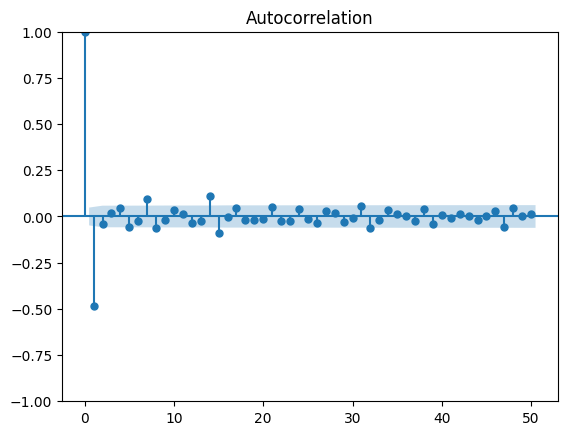

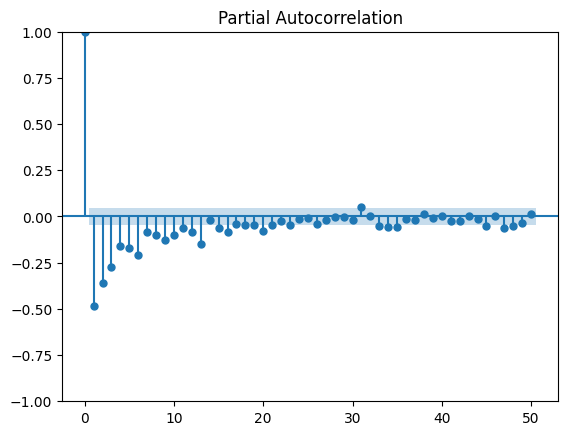

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plot_acf(series_df['sales_diff'].dropna(), lags=50)
plot_pacf(series_df['sales_diff'].dropna(), lags=50)
plt.show()


In [18]:
# Use 'sales' from train_df
train_series = train_df.set_index('date')['sales']


In [22]:
# Subset the data for the years 2015 and 2016
subset_train_series = train_series['2015-01-01':'2016-12-31']

# Get the number of values (data points) in this subset
num_values = len(subset_train_series)

# Print the number of values
print(f"Number of values for 2015 and 2016: {num_values}")


Number of values for 2015 and 2016: 1325808


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def train_sarima(df, store_nbr, family, 
                 order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), 
                 resample_freq='W', print_summary=True):
    """
    Trains a SARIMA model on a filtered and resampled dataset.
    
    Parameters:
    - df: Original DataFrame
    - store_nbr: Store number to filter
    - family: Product family to filter
    - order: (p, d, q) tuple for ARIMA
    - seasonal_order: (P, D, Q, s) tuple for SARIMA
    - resample_freq: Frequency to resample data (e.g., 'W' for weekly)
    - print_summary: Whether to print model summary

    Returns:
    - fitted_model: Trained SARIMA model
    """
    # Filter by store and family
    series_df = df[(df['store_nbr'] == store_nbr) & (df['family'] == family)].copy()
    series_df = series_df[['date', 'sales']]
    series_df['date'] = pd.to_datetime(series_df['date'])
    series_df.set_index('date', inplace=True)

    # Optional resampling (to reduce number of data points)
    if resample_freq:
        series_df = series_df.resample(resample_freq).sum()

    # Fit SARIMA model
    model = SARIMAX(series_df['sales'],
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    fitted_model = model.fit(disp=False)

    if print_summary:
        print(fitted_model.summary())

    return fitted_model


In [28]:
# Example: Train SARIMA on weekly AUTOMOTIVE sales in store 1
model = train_sarima(df, store_nbr=1, family='AUTOMOTIVE',
                     order=(1, 0, 1), seasonal_order=(0, 0, 0, 0),
                     resample_freq='W')


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  242
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -811.697
Date:                Tue, 06 May 2025   AIC                           1629.394
Time:                        16:28:03   BIC                           1639.836
Sample:                    01-06-2013   HQIC                          1633.602
                         - 08-20-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0018      0.002    406.875      0.000       0.997       1.007
ma.L1         -0.8717      0.032    -26.919      0.000      -0.935      -0.808
sigma2        50.4166      4.293     11.743      0.0

In [29]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Filter data for one time series (store 1, AUTOMOTIVE)
series_df = df[(df['store_nbr'] == 1) & (df['family'] == 'AUTOMOTIVE')].copy()
series_df['date'] = pd.to_datetime(series_df['date'])
series_df.sort_values('date', inplace=True)
series_df.set_index('date', inplace=True)

# Step 2: Train-test split (last 2 years as test)
train = series_df[series_df.index < '2017-01-01']['sales']
test = series_df[series_df.index >= '2017-01-01']['sales']

# Step 3: Fit SARIMA model (based on your earlier analysis)
model = SARIMAX(train,
                order=(1, 0, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.get_forecast(steps=len(test))
preds = forecast.predicted_mean
conf_int = forecast.conf_int()

# Step 5: Evaluate accuracy
rmse = np.sqrt(mean_squared_error(test, preds))
print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 2.82


In [30]:
# Get the unique values for 'store_nbr' and 'family'
print("Unique store numbers:")
print(df['store_nbr'].unique())

print("\nUnique families:")
print(df['family'].unique())

# Get the value counts for 'store_nbr' and 'family'
print("\nStore number counts:")
print(df['store_nbr'].value_counts())

print("\nFamily counts:")
print(df['family'].value_counts())


Unique store numbers:
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]

Unique families:
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

Store number counts:
store_nbr
1     56562
46    56562
36    56562
37    56562
38    56562
39    56562
4     56562
40    56562
41    56562
42    56562
43    56562
44    56562
45    56562
47    56562
10    56562
48    56562
49    56562
5     56562
50    56562
51    56562
52    56562
53    56562
54    56562
6     56562
7     56562


In [26]:
# Filter data for one store (e.g., store number 1)
store_data = df[df['store_nbr'] == 1]

# Make sure it's sorted by date
store_data = store_data.sort_values('date')

# Set 'date' as index for time series analysis
store_data.set_index('date', inplace=True)

# Apply SARIMA to this store's time series (e.g., ARIMA(1,0,1))
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(store_data['sales'],
                       order=(1, 0, 1),  # ARIMA(1, 0, 1)
                       seasonal_order=(0, 0, 0, 0),  # No seasonality for now
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarima_model_fitted = sarima_model.fit()

# Display the model summary
print(sarima_model_fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                56562
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -441755.282
Date:                Tue, 06 May 2025   AIC                         883516.565
Time:                        15:55:27   BIC                         883543.394
Sample:                             0   HQIC                        883524.921
                              - 56562                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.34e-05   7.46e+04      0.000       1.000       1.000
ma.L1         -0.9987      0.000  -3882.525      0.000      -0.999      -0.998
sigma2      4.077e+05   9.46e-13   4.31e+17      0.0

In [25]:
df['date'].head(10)
#df['date'].tail(10)

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
5   2013-01-01
6   2013-01-01
7   2013-01-01
8   2013-01-01
9   2013-01-01
Name: date, dtype: datetime64[ns]

In [23]:
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to fit SARIMA and measure training time
def fit_sarima_subset(train_subset):
    start_time = time.time()

    # Define and fit the SARIMA model on the subset of data
    sarima_model = SARIMAX(train_subset, 
                           order=(1, 0, 1),  # ARIMA(1, 0, 1)
                           seasonal_order=(0, 0, 0, 0),  # No seasonality for now
                           enforce_stationarity=False, 
                           enforce_invertibility=False)

    sarima_model_fitted = sarima_model.fit()
    
    end_time = time.time()
    training_time = end_time - start_time  # Time taken for training

    print(f"Training time for {len(train_subset)} rows: {training_time:.2f} seconds")
    print(sarima_model_fitted.summary())

    return training_time

# Example: Experiment with the first 6 months, 1 year, 2 years, etc.
# We will use the 'train_df' which should already be sorted by date
train_subset_6_months = train_df[train_df['date'] < '2016-07-01']
train_subset_1_year = train_df[train_df['date'] < '2017-01-01']
train_subset_2_years = train_df[train_df['date'] < '2018-01-01']

# Fit SARIMA model on different subsets
print("Fitting model on first 6 months of data:")
fit_sarima_subset(train_subset_6_months['sales'])

print("\nFitting model on first 1 year of data:")
fit_sarima_subset(train_subset_1_year['sales'])

print("\nFitting model on first 2 years of data:")
fit_sarima_subset(train_subset_2_years['sales'])


Fitting model on first 6 months of data:


KeyboardInterrupt: 

In [21]:
# Example: Subset the data to the first two years (adjust the dates as needed)
subset_train_series = train_series['2015-01-01':'2016-12-31']

# Fit the SARIMA model on the subset of the data
sarima_model = SARIMAX(subset_train_series,
                       order=(1, 0, 1),  # ARIMA(1, 0, 1)
                       seasonal_order=(0, 0, 0, 0),  # No seasonality for now
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarima_model_fitted = sarima_model.fit()

# Display the model summary
print(sarima_model_fitted.summary())


KeyboardInterrupt: 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMA model on training data
sarima_model = SARIMAX(train_series, 
                       order=(1, 0, 1),  # ARIMA(1, 0, 1)
                       seasonal_order=(0, 0, 0, 0),  # No seasonality for now
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarima_model_fitted = sarima_model.fit()

# Display the model summary
print(sarima_model_fitted.summary())


In [ ]:
# Plot residuals
residuals = sarima_model_fitted.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals from SARIMA(1,0,1)(0,0,0)[0]")
plt.show()

# Plot ACF of residuals to check for any patterns
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=50)
plt.show()
